In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import math
from scipy.stats import shapiro 
from scipy.stats import kstest

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\TOYGAR\AppData\Local\Temp\ipykernel_16648\3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
#### DF CONTROL ##### 

In [4]:
df_test = pd.read_csv('test_group.csv', sep=";")
df_test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [5]:
df_test.rename(columns = {'Spend [USD]':'Spend_USD', '# of Impressions':'Number of Impressions',
                        '# of Website Clicks':  'Number of Website Clicks',
                        '# of Searches':'Number of Searches', '# of View Content':'Number of View Content',
                        '# of Add to Cart':'Number of Add to Cart', '# of Purchase':'Number of Purchase' }, 
              inplace = True)
df_test.head()

,Campaign Name,Date,Spend_USD,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Campaign Name             30 non-null     object
 1   Date                      30 non-null     object
 2   Spend_USD                 30 non-null     int64 
 3   Number of Impressions     30 non-null     int64 
 4   Reach                     30 non-null     int64 
 5   Number of Website Clicks  30 non-null     int64 
 6   Number of Searches        30 non-null     int64 
 7   Number of View Content    30 non-null     int64 
 8   Number of Add to Cart     30 non-null     int64 
 9   Number of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [7]:
#change date datatypes
df_test['Date'] = pd.to_datetime(df_test['Date'], format='%d.%m.%Y')
df_test.iloc[:,2:10] = df_test.iloc[:,2:10].apply(pd.to_numeric)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Campaign Name             30 non-null     object        
 1   Date                      30 non-null     datetime64[ns]
 2   Spend_USD                 30 non-null     int64         
 3   Number of Impressions     30 non-null     int64         
 4   Reach                     30 non-null     int64         
 5   Number of Website Clicks  30 non-null     int64         
 6   Number of Searches        30 non-null     int64         
 7   Number of View Content    30 non-null     int64         
 8   Number of Add to Cart     30 non-null     int64         
 9   Number of Purchase        30 non-null     int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 2.5+ KB


In [8]:
df_test.describe()

,Spend_USD,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000


In [9]:
##### DF CONTROL ##### 

In [10]:
df_control = pd.read_csv('control_group.csv', sep=";")
df_control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_control.rename(columns = {'Spend [USD]':'Spend_USD', '# of Impressions':'Number of Impressions',
                        '# of Website Clicks':  'Number of Website Clicks',
                        '# of Searches':'Number of Searches', '# of View Content':'Number of View Content',
                        '# of Add to Cart':'Number of Add to Cart', '# of Purchase':'Number of Purchase' }, 
              inplace = True)
df_control.head()

,Campaign Name,Date,Spend_USD,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Campaign Name             30 non-null     object 
 1   Date                      30 non-null     object 
 2   Spend_USD                 30 non-null     int64  
 3   Number of Impressions     29 non-null     float64
 4   Reach                     29 non-null     float64
 5   Number of Website Clicks  29 non-null     float64
 6   Number of Searches        29 non-null     float64
 7   Number of View Content    29 non-null     float64
 8   Number of Add to Cart     29 non-null     float64
 9   Number of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [13]:
df_control['Date'] = pd.to_datetime(df_control['Date'], format='%d.%m.%Y')
df_control.iloc[:,2:10] = df_control.iloc[:,2:10].apply(pd.to_numeric)
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Campaign Name             30 non-null     object        
 1   Date                      30 non-null     datetime64[ns]
 2   Spend_USD                 30 non-null     int64         
 3   Number of Impressions     29 non-null     float64       
 4   Reach                     29 non-null     float64       
 5   Number of Website Clicks  29 non-null     float64       
 6   Number of Searches        29 non-null     float64       
 7   Number of View Content    29 non-null     float64       
 8   Number of Add to Cart     29 non-null     float64       
 9   Number of Purchase        29 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.5+ KB


In [14]:
#There is a row with missing values. Let's fill the missing values with K-Nearest Neighbor.
imputer = KNNImputer(weights='distance')
df_control.iloc[:,2:10]=pd.DataFrame(imputer.fit_transform(df_control.iloc[:,2:10]))

In [15]:
df_control.head()

,Campaign Name,Date,Spend_USD,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase
0,Control Campaign,2019-08-01,2280.0,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.00000,618.000000
1,Control Campaign,2019-08-02,1757.0,121040.000000,102513.000000,8110.000000,2033.000000,1841.000000,1219.00000,511.000000
2,Control Campaign,2019-08-03,2343.0,131711.000000,110862.000000,6508.000000,1737.000000,1549.000000,1134.00000,372.000000
3,Control Campaign,2019-08-04,1940.0,72878.000000,61235.000000,3065.000000,1042.000000,982.000000,1183.00000,340.000000
4,Control Campaign,2019-08-05,1835.0,99328.079583,80183.346166,5733.358353,2147.197568,1943.443727,1363.53056,598.735991


In [16]:
df_control.describe()

,Spend_USD,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2288.433333,109218.702653,88556.211539,5334.545278,2218.839919,1943.781458,1302.117685,525.324533
std,367.334451,21393.408777,21510.834457,1728.445776,851.133358,764.021910,400.539188,182.338435
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1945.500000,93853.769896,75300.250000,4122.250000,1629.250000,1249.000000,942.500000,375.500000
50%,2299.500000,112368.000000,91418.000000,5329.500000,2340.000000,1979.500000,1351.265280,506.000000
75%,2532.000000,121259.000000,101958.750000,6609.500000,2655.000000,2360.500000,1638.000000,663.250000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


In [17]:
df_control.head()

,Campaign Name,Date,Spend_USD,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase
0,Control Campaign,2019-08-01,2280.0,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.00000,618.000000
1,Control Campaign,2019-08-02,1757.0,121040.000000,102513.000000,8110.000000,2033.000000,1841.000000,1219.00000,511.000000
2,Control Campaign,2019-08-03,2343.0,131711.000000,110862.000000,6508.000000,1737.000000,1549.000000,1134.00000,372.000000
3,Control Campaign,2019-08-04,1940.0,72878.000000,61235.000000,3065.000000,1042.000000,982.000000,1183.00000,340.000000
4,Control Campaign,2019-08-05,1835.0,99328.079583,80183.346166,5733.358353,2147.197568,1943.443727,1363.53056,598.735991


In [18]:
#Combine two datasets into one and add new features for metrics evaluation
df = pd.concat([df_test,df_control])
df = df.reset_index()
df['USD Spend per Purchase'] = round(df['Spend_USD']/df['Number of Purchase'],2)
df['CTR(%)'] = round(df['Number of Website Clicks']*100/df['Number of Impressions'],2)
df['Conversion Rate(%)'] = round(df['Number of Purchase']*100/df['Number of Website Clicks'],2)
df['Add to Cart Rate(%)'] = round(df['Number of Purchase']*100/df['Number of Add to Cart'],2)

In [19]:
df["Campaign Name"].unique()

array(['Test Campaign', 'Control Campaign'], dtype=object)

In [20]:
df.describe()

,index,Spend_USD,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase,USD Spend per Purchase,CTR(%),Conversion Rate(%),Add to Cart Rate(%)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,14.500000,2425.750000,91901.751326,71023.889103,5683.439306,2318.903293,1900.890729,1091.825509,523.278933,5.443167,7.679833,10.336833,53.725500
std,8.728484,381.130461,32203.529695,30783.114485,1739.855353,663.729441,681.437585,428.032848,195.548610,2.502151,5.586975,5.760707,23.251312
min,0.000000,1757.000000,22521.000000,10598.000000,2277.000000,1001.000000,848.000000,278.000000,222.000000,2.250000,1.860000,3.010000,14.340000
25%,7.000000,2073.750000,69558.250000,43235.500000,4230.750000,1970.750000,1249.000000,863.250000,340.000000,3.467500,4.315000,6.345000,39.425000
50%,14.500000,2420.500000,97585.539791,77422.000000,5712.179177,2374.500000,1959.221864,1082.500000,506.000000,4.705000,6.075000,8.830000,53.900000
75%,22.000000,2727.500000,117160.500000,95314.250000,7201.250000,2755.750000,2422.500000,1384.250000,685.000000,7.490000,8.435000,13.025000,65.830000
max,29.000000,3112.000000,145248.000000,127852.000000,8264.000000,4891.000000,4219.000000,1913.000000,890.000000,12.700000,33.820000,32.240000,151.580000


In [21]:
df.head()

,index,Campaign Name,Date,Spend_USD,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase,USD Spend per Purchase,CTR(%),Conversion Rate(%),Add to Cart Rate(%)
0,0,Test Campaign,2019-08-01,3008.0,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0,11.80,7.68,8.39,28.52
1,1,Test Campaign,2019-08-02,2542.0,100719.0,91236.0,4657.0,2359.0,1548.0,879.0,677.0,3.75,4.62,14.54,77.02
2,2,Test Campaign,2019-08-03,2365.0,70263.0,45198.0,7885.0,2572.0,2367.0,1268.0,578.0,4.09,11.22,7.33,45.58
3,3,Test Campaign,2019-08-04,2710.0,78451.0,25937.0,4216.0,2216.0,1437.0,566.0,340.0,7.97,5.37,8.06,60.07
4,4,Test Campaign,2019-08-05,2297.0,114295.0,95138.0,5863.0,2106.0,858.0,956.0,768.0,2.99,5.13,13.10,80.33


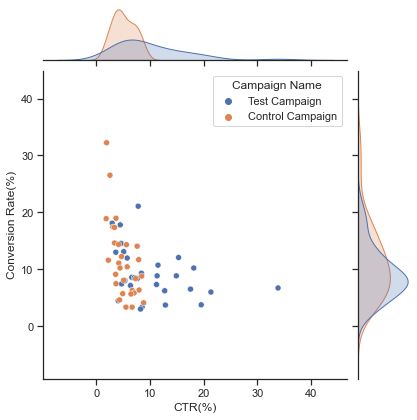

In [22]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=df,
    x="CTR(%)", y="Conversion Rate(%)", hue="Campaign Name",
    kind="scatter",
)
plt.show()

In [23]:
# CTR= Number of Website Clicks / Number of Impressions 
# Conversion rate = yapılan satış / websitesi klik sayısı (ziyaret başına satınalınan ürün sayısı) ziyaret başın ayapılan ticari işlem -------Number of Purchase']*100/df['Number of Website Clicks'
# control grubu klik başına yapılan ortalama ticari işlemde daha başarılıyken test grubu reklam başına websitesine erişimde daha başarılı. 

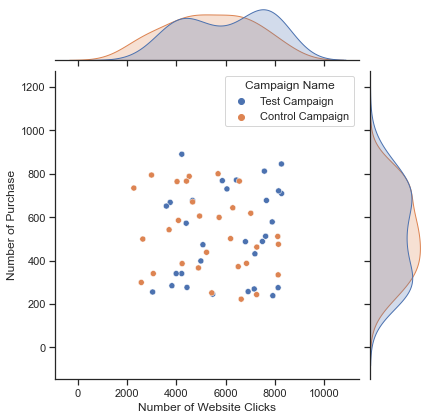

In [24]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=df,
    x="Number of Website Clicks", y="Number of Purchase", hue="Campaign Name",
    kind="scatter",
)
plt.show()

In [25]:
# yapılan satış işlemi sayısı vs websitesi ziyaret sayısı
# puchase: yapılan ticari işlem sayısı
# dağılım eşit gibi gröünüyor test ve kontrol grupları için, bir ayrışma görünmüyor

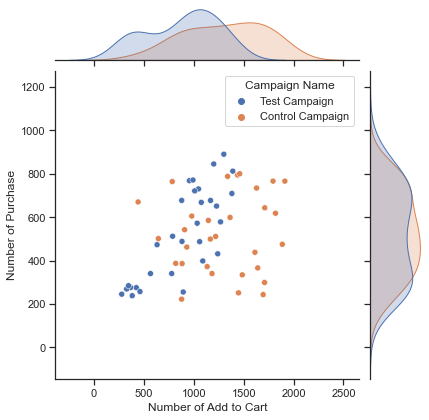

In [26]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=df,
    x="Number of Add to Cart", y="Number of Purchase", hue="Campaign Name",
    kind="scatter",
)
plt.show()

In [27]:
# kontrol grubunda yapılan ticari işlem başına alınan ürün sayısı daha fazladır. 

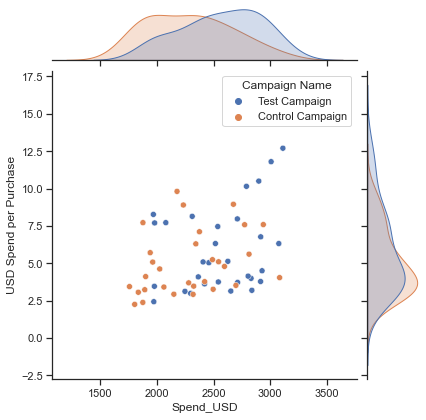

In [28]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=df,
    x="Spend_USD", y="USD Spend per Purchase", hue="Campaign Name",
    kind="scatter",
)
plt.show()

In [29]:
# gün başına (günlük) toplam harcanan USD vs satınalma işlemi başına harcanan USD 
# test grubu daha pahalı ticari işlemler yapmış control grubuna göre. 


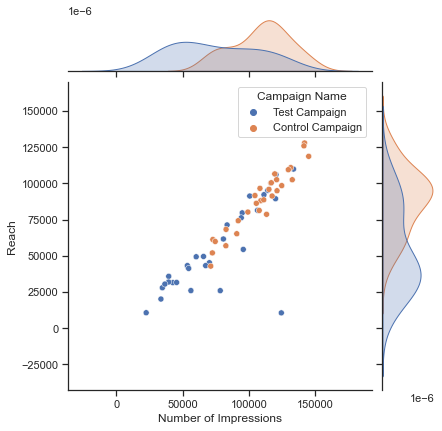

In [30]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=df,
    x="Number of Impressions", y="Reach", hue="Campaign Name",
    kind="scatter",
)
plt.show()

In [31]:
# reklamın tüketiciye ulaşma sayısı vs reklama maruz (reklamı görme) kalma sayısı
#kontrol grubunda hem impression hem de reach sayısı daha fazla test grubuna göre test group.

In [32]:
total_spend = df.groupby(['Campaign Name'])['Spend_USD'].sum().reset_index()
total_spend


,Campaign Name,Spend_USD
0,Control Campaign,68653.0
1,Test Campaign,76892.0


In [33]:
total_spend_uplift = (76892-68653)/68653
total_spend_uplift

0.12000932224374754

In [34]:
#test grubunun total harcanan usd miktarı 12% daha fazla

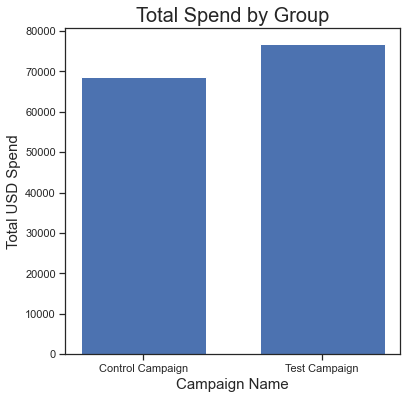

In [35]:
fig = plt.figure(figsize = (6, 6))
plt.bar(total_spend['Campaign Name'], total_spend['Spend_USD'], width = 0.7)
plt.xlabel("Campaign Name", fontdict = {'fontsize' : 15})
plt.ylabel("Total USD Spend",fontdict = {'fontsize' : 15})
plt.title("Total Spend by Group", fontdict = {'fontsize' : 20})
plt.show()

In [36]:
spend_per_purchase = df.groupby(['Campaign Name'])['USD Spend per Purchase'].mean().reset_index()
spend_per_purchase

,Campaign Name,USD Spend per Purchase
0,Control Campaign,4.986333
1,Test Campaign,5.900000


In [37]:
# ticari işlem başına harcanan USD. 
# Total spend USD önemli fakat operasyon giderlerini de düşündüğümüzde tek seferde fazla ya da pahalı ürün satabilmek önmeli

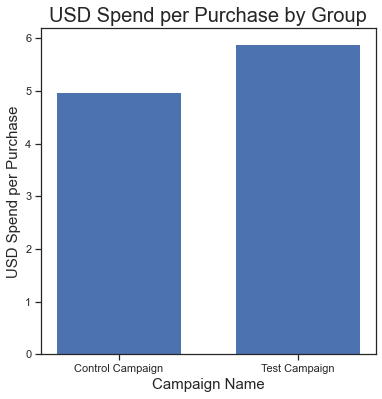

In [38]:
fig = plt.figure(figsize = (6, 6))
plt.bar(spend_per_purchase['Campaign Name'], spend_per_purchase['USD Spend per Purchase'], width = 0.7)
plt.xlabel("Campaign Name", fontdict = {'fontsize' : 15})
plt.ylabel("USD Spend per Purchase",fontdict = {'fontsize' : 15})
plt.title("USD Spend per Purchase by Group", fontdict = {'fontsize' : 20})
plt.show()

In [39]:
spend_per_purchase_uplift = (5.900000-4.986333)/4.986333
spend_per_purchase_uplift

0.1832342525057994

In [40]:
#spend_per_purchase_uplift % artış mikatrı

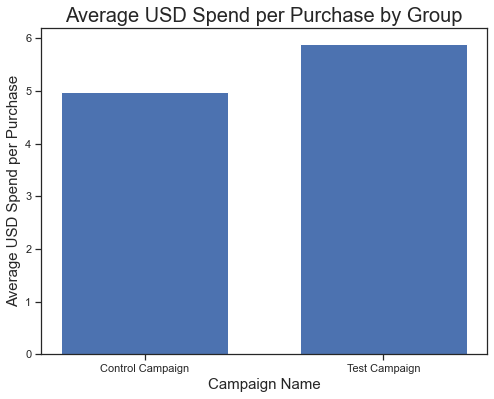

In [41]:
fig = plt.figure(figsize = (8,6))
plt.bar(spend_per_purchase['Campaign Name'], spend_per_purchase['USD Spend per Purchase'], width = 0.7)
plt.xlabel("Campaign Name", fontdict = {'fontsize' : 15})
plt.ylabel("Average USD Spend per Purchase", fontdict = {'fontsize' : 15})
plt.title("Average USD Spend per Purchase by Group", fontdict = {'fontsize' : 20})
plt.show()

In [42]:
#ticari işlem başına ortalamam harcanan USD 

In [43]:
num_of_purchase = df.groupby(['Campaign Name'])['Number of Purchase'].sum().reset_index()
num_of_purchase

,Campaign Name,Number of Purchase
0,Control Campaign,15759.735991
1,Test Campaign,15637.000000


In [44]:
#ticari işlem sayısı düşmesine rağmen bir satın alımda daha çok ürün almışlar ya da satılan ürün skalası değişmiş olabilir.
#charta eklenen ürün sayısına bakılarak bu anlaşılaiblir.

In [45]:
num_of_add_cart = df.groupby(['Campaign Name'])['Number of Add to Cart'].sum().reset_index()
num_of_add_cart

,Campaign Name,Number of Add to Cart
0,Control Campaign,39063.53056
1,Test Campaign,26446.00000


In [46]:
#test grubunda carta çok daha az ürün eklenmiş. ürün skalası değişmiş olabilir ya da test grubunda carta eklenen ürünler daha az remove edilmiş olabilir.

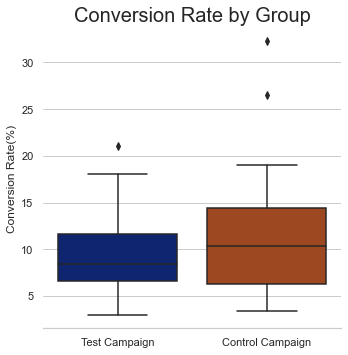

In [47]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df, kind="box",x="Campaign Name",
    y="Conversion Rate(%)",
    palette="dark"
)
g.despine(left=True)
g.set_axis_labels("", "Conversion Rate(%)")
plt.title('Conversion Rate by Group', fontdict = {'fontsize' : 20})
plt.show()

In [48]:
conversion_rate = df.groupby(['Campaign Name'])['Conversion Rate(%)'].mean().reset_index()
conversion_rate

,Campaign Name,Conversion Rate(%)
0,Control Campaign,11.443000
1,Test Campaign,9.230667


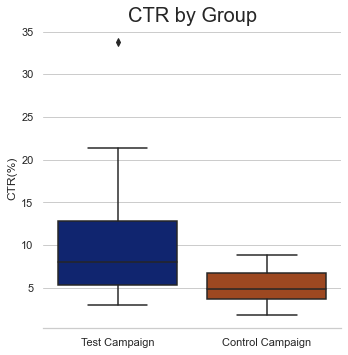

In [49]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df, kind="box",x="Campaign Name",
    y="CTR(%)",
    palette="dark"
)
g.despine(left=True)
g.set_axis_labels("", "CTR(%)")
plt.title('CTR by Group', fontdict = {'fontsize' : 20})
plt.show()

In [50]:
#hedef kitleye yönelik reklam sunulmuş olabilir ya da reklam daha çekici hale getirilmiş (reklam içeriği değiştirilmiş) olabilir.

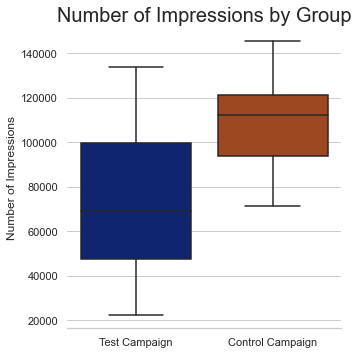

In [51]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df, kind="box",x="Campaign Name",
    y="Number of Impressions",
    palette="dark"
)
g.despine(left=True)
g.set_axis_labels("", "Number of Impressions")
plt.title('Number of Impressions by Group', fontdict = {'fontsize' : 20})
plt.show()

In [52]:
#Reklamın kullanıcıların ekranına düşme sayısı

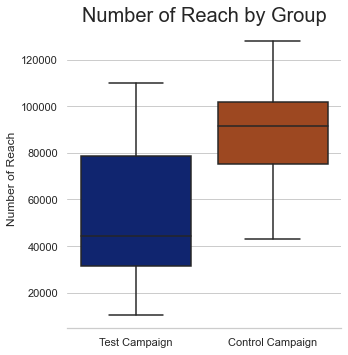

In [53]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df, kind="box",x="Campaign Name",
    y="Reach",
    palette="dark"
)
g.despine(left=True)
g.set_axis_labels("", "Number of Reach")
plt.title('Number of Reach by Group', fontdict = {'fontsize' : 20})
plt.show()

In [54]:
#Unique people who saw an ad 

In [55]:
#AB Testi

In [56]:
df_2 = df.copy()
df_2 = df_2.drop(['index','Date'], axis=1)
test_g = df_2[df_2['Campaign Name']=="Test Campaign"]
control_g = df_2[df_2['Campaign Name']=="Control Campaign"]

In [57]:
#ve test ve control grubundaki dataları farklı değişkenlere atamış olduk. 

In [58]:
control_g.head()

,Campaign Name,Spend_USD,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase,USD Spend per Purchase,CTR(%),Conversion Rate(%),Add to Cart Rate(%)
30,Control Campaign,2280.0,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.00000,618.000000,3.69,8.48,8.81,33.97
31,Control Campaign,1757.0,121040.000000,102513.000000,8110.000000,2033.000000,1841.000000,1219.00000,511.000000,3.44,6.70,6.30,41.92
32,Control Campaign,2343.0,131711.000000,110862.000000,6508.000000,1737.000000,1549.000000,1134.00000,372.000000,6.30,4.94,5.72,32.80
33,Control Campaign,1940.0,72878.000000,61235.000000,3065.000000,1042.000000,982.000000,1183.00000,340.000000,5.71,4.21,11.09,28.74
34,Control Campaign,1835.0,99328.079583,80183.346166,5733.358353,2147.197568,1943.443727,1363.53056,598.735991,3.06,5.77,10.44,43.91


In [59]:
test_group_cr = test_g['Conversion Rate(%)']
control_group_cr = control_g['Conversion Rate(%)']
test_group_cr.describe()

count    30.000000
mean      9.230667
std       4.449266
min       3.010000
25%       6.570000
50%       8.450000
75%      11.667500
max      21.090000
Name: Conversion Rate(%), dtype: float64

In [60]:
control_group_cr.describe()

count    30.000000
mean     11.443000
std       6.722221
min       3.350000
25%       6.315000
50%      10.335000
75%      14.365000
max      32.240000
Name: Conversion Rate(%), dtype: float64

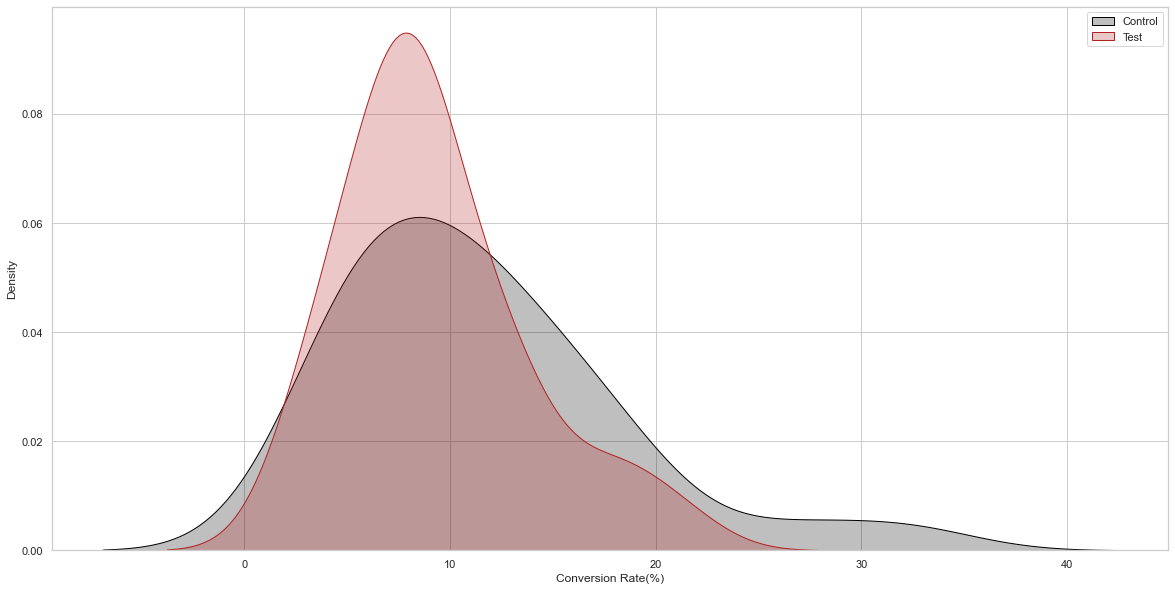

In [62]:
plt.figure(figsize=(20, 10))
sns.kdeplot(control_group_cr, label="Control", shade = True, color = '#000000')
sns.kdeplot(test_group_cr, label="Test", shade = True, color = '#B22222')
plt.legend()

In [63]:
#Test grubunda müşteri davranışları daha benzer hale gelmiş durumda. ortalamalar aynı. control grubunda biraz daha uç data var. 

C:\Users\TOYGAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Conversion Rate(%)'>

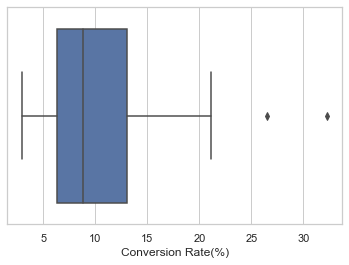

In [64]:
sns.boxplot(df['Conversion Rate(%)'])

In [65]:
#karışım datasetinin Boxplot grafiği. medyan 8 gibi duruyor. 2 tane outlier data var gibi duruyor.  

In [66]:
print(np.where(df['Conversion Rate(%)']>25))

(array([39, 41], dtype=int64),)


In [67]:
#remove the outliers
df_3 = df_2[df_2['Conversion Rate(%)']<25]
test_g_cr = df_3[df_3['Campaign Name']=="Test Campaign"]
control_g_cr = df_3[df_3['Campaign Name']=="Control Campaign"]
test_group_cr = test_g_cr['Conversion Rate(%)']
control_group_cr = control_g_cr['Conversion Rate(%)']


In [68]:
#burada outlier data temizlendikten sonra tekrar atama yapıldı. makalede bu kısım atlanmış olacak. outlierlar ilk başta temizlenecek. varyansları çok yakın hale geldi. böylece AB test uygularken we can perform a standard independent 2 sample test. 

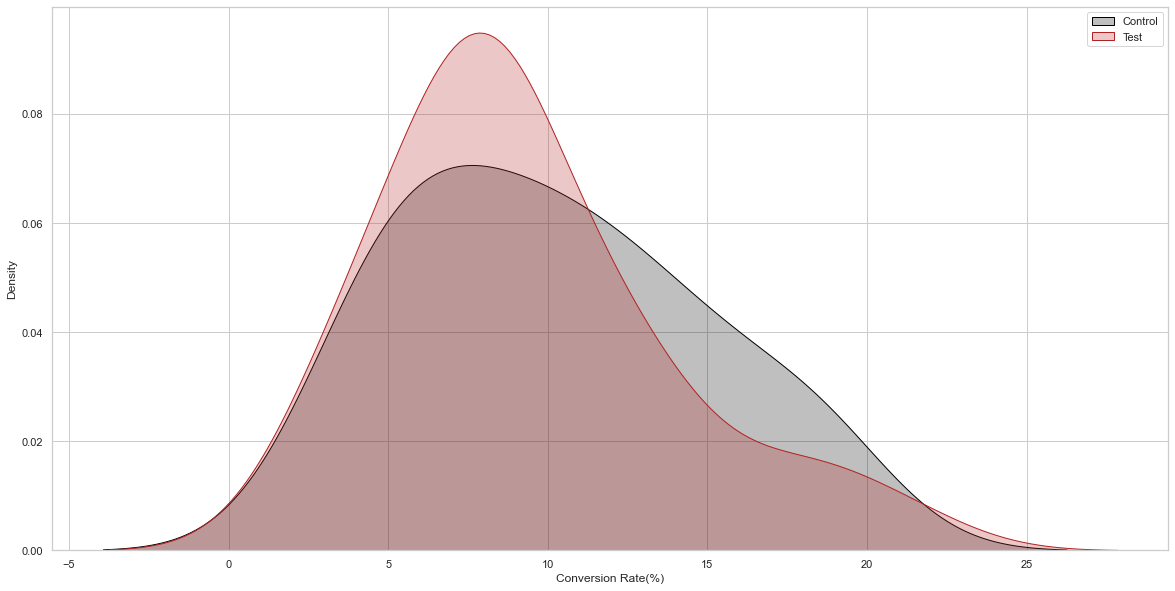

In [69]:
#now plot the data distribution again
plt.figure(figsize=(20, 10))
sns.kdeplot(control_group_cr, label="Control", shade = True, color = '#000000')
sns.kdeplot(test_group_cr, label="Test", shade = True, color = '#B22222')
plt.legend()

In [70]:
#grafiğin düzelmiş hali

In [71]:
## H0: A = B  - Null Hypothesis
## H1: A != B  - Alternative Hypothesis
# set ⍺ = 0.05
test_cr = stats.ttest_ind(test_group_cr,control_group_cr, equal_var = True)

print(test_cr)

Ttest_indResult(statistic=-0.772161045764481, pvalue=0.4432656246296265)


In [72]:
# https://towardsdatascience.com/hypothesis-testing-a-b-tests-explained-4d89de6b4ad2
# pvalue > 0.05 olduğu için h0 hipotezi kabul edilir. 

#CTR reklam başarısını gösterir. conversion rate bidding type'ındaki değişmenin başarısını gösteriyor.


In [73]:
df.head() 

,index,Campaign Name,Date,Spend_USD,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase,USD Spend per Purchase,CTR(%),Conversion Rate(%),Add to Cart Rate(%)
0,0,Test Campaign,2019-08-01,3008.0,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0,11.80,7.68,8.39,28.52
1,1,Test Campaign,2019-08-02,2542.0,100719.0,91236.0,4657.0,2359.0,1548.0,879.0,677.0,3.75,4.62,14.54,77.02
2,2,Test Campaign,2019-08-03,2365.0,70263.0,45198.0,7885.0,2572.0,2367.0,1268.0,578.0,4.09,11.22,7.33,45.58
3,3,Test Campaign,2019-08-04,2710.0,78451.0,25937.0,4216.0,2216.0,1437.0,566.0,340.0,7.97,5.37,8.06,60.07
4,4,Test Campaign,2019-08-05,2297.0,114295.0,95138.0,5863.0,2106.0,858.0,956.0,768.0,2.99,5.13,13.10,80.33


C:\Users\TOYGAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CTR(%)'>

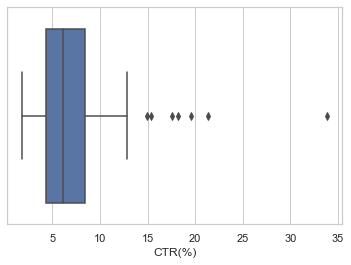

In [74]:
sns.boxplot(df['CTR(%)'])

In [75]:
#remove an outlier
df_4 = df_2[df_2['CTR(%)']<33]
test_g_ctr = df_4[df_4['Campaign Name']=="Test Campaign"]
control_g_ctr = df_4[df_4['Campaign Name']=="Control Campaign"]

test_group_ctr = test_g_ctr['CTR(%)']
control_group_ctr = control_g_ctr['CTR(%)']
test_group_ctr.describe()

count    29.000000
mean      9.428621
std       5.191610
min       2.980000
25%       5.290000
50%       7.820000
75%      12.750000
max      21.340000
Name: CTR(%), dtype: float64

In [76]:
control_group_ctr.describe()

count    30.000000
mean      5.118000
std       2.017823
min       1.860000
25%       3.637500
50%       4.830000
75%       6.697500
max       8.830000
Name: CTR(%), dtype: float64

In [77]:
print(np.where(df['CTR(%)']>33))

(array([18], dtype=int64),)


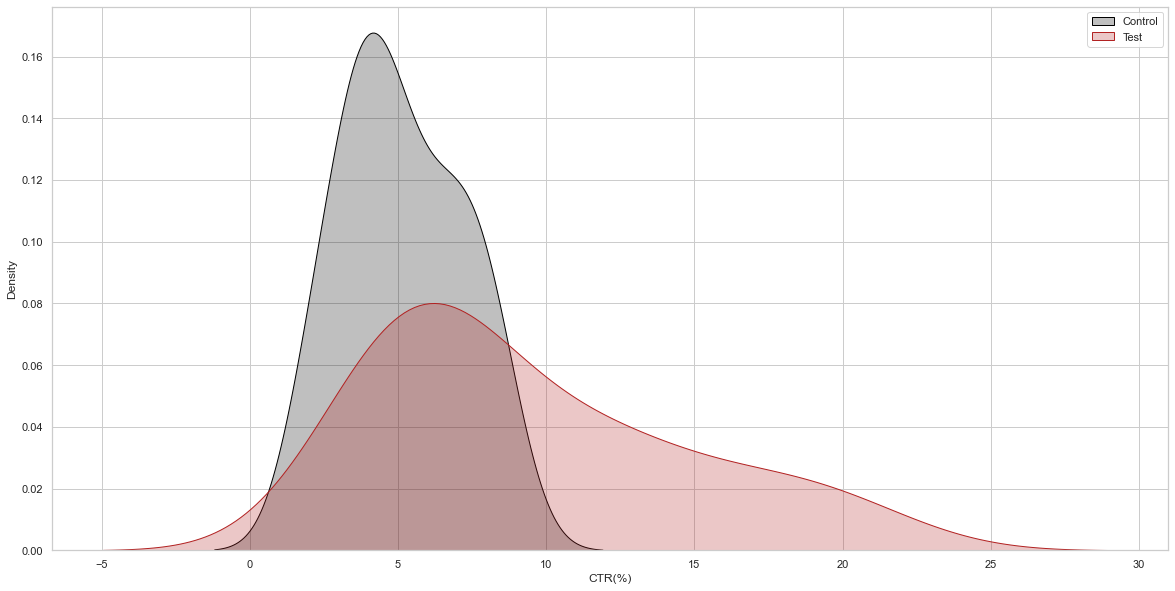

In [78]:
plt.figure(figsize=(20, 10))
sns.kdeplot(control_group_ctr, label="Control", shade = True, color = '#000000')
sns.kdeplot(test_group_ctr, label="Test", shade = True, color = '#B22222')
plt.legend()

In [79]:
#Shapiro-Wilk Test
shapiro(test_group_ctr)

ShapiroResult(statistic=0.9022210240364075, pvalue=0.011077619157731533)

In [80]:
shapiro(control_group_ctr)

ShapiroResult(statistic=0.9616268873214722, pvalue=0.3406710624694824)

In [81]:
#Kolmogorov-Smirnov
kstest(test_group_ctr, 'norm')

KstestResult(statistic=0.99855875808266, pvalue=8.024161350496243e-83)

In [82]:
#test grup normal dağılıma sahip değil. bu yüzden AB test uygulamamız doğru sonu. vermeyecektir. test verisi normal dağılıma çevrildikten sonra AB test CTR için tekrar bakılabilir.

#CTR(%) A/B TEST

## H0: A = B  - Null Hypothesis
## H1: A != B  - Alternative Hypothesis
# set ⍺ = 0.05
test_ctr = stats.ttest_ind(test_group_ctr,control_group_ctr, equal_var = False)

print(test_ctr)

#pvalue < 0.05 olduğu için H0 hipotezi reddedilir. A = B diyemeyiz. 

In [83]:
#test_group_ctr.mean()

In [84]:
#control_group_ctr.mean()

In [85]:
#test grubunun ctr daha yüksek olduğu için test grubu seçilir. 

In [86]:
#ADD TO CART RATE AB TEST

C:\Users\TOYGAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Add to Cart Rate(%)'>

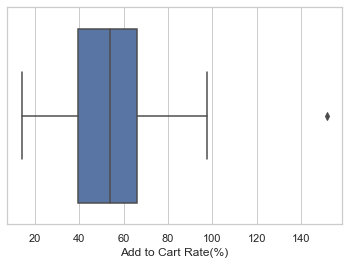

In [87]:
sns.boxplot(df_2['Add to Cart Rate(%)'])

In [88]:
print(np.where(df_2['Add to Cart Rate(%)']>140))

(array([59], dtype=int64),)


In [89]:
#remove outlier
df_5 = df_2[df_2['Add to Cart Rate(%)']<140]
test_g_acr = df_5[df_5['Campaign Name']=="Test Campaign"]
control_g_acr = df_5[df_5['Campaign Name']=="Control Campaign"]

test_group_acr = test_g_acr['Add to Cart Rate(%)']
control_group_acr = control_g_acr['Add to Cart Rate(%)']

In [90]:
test_group_acr.describe()

count    30.000000
mean     61.794333
std      15.146493
min      28.520000
25%      53.587500
50%      62.140000
75%      73.995000
max      88.130000
Name: Add to Cart Rate(%), dtype: float64

In [91]:
control_group_acr.describe()

count    29.000000
mean     42.004138
std      18.642032
min      14.340000
25%      27.150000
50%      42.700000
75%      51.050000
max      97.450000
Name: Add to Cart Rate(%), dtype: float64

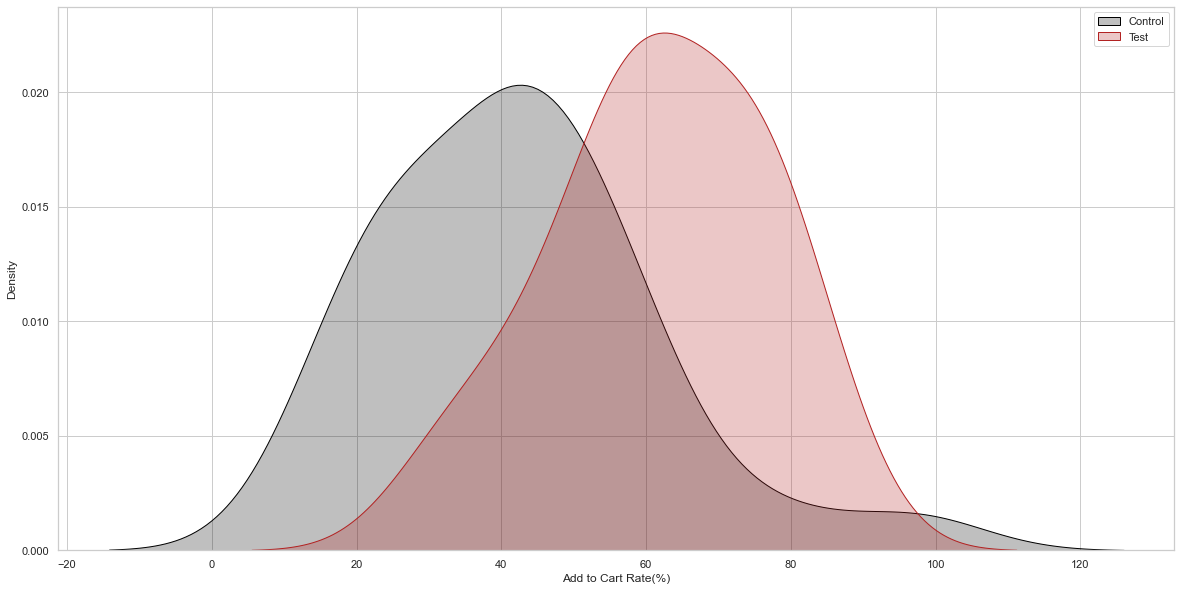

In [92]:
plt.figure(figsize=(20, 10))
sns.kdeplot(control_group_acr, label="Control", shade = True, color = '#000000')
sns.kdeplot(test_group_acr, label="Test", shade = True, color = '#B22222')
plt.legend()

In [95]:
shapiro(control_group_acr)

ShapiroResult(statistic=0.9409807920455933, pvalue=0.10637930035591125)

In [96]:
shapiro(test_group_acr)

ShapiroResult(statistic=0.9772595167160034, pvalue=0.748958170413971)

In [97]:
#Add to Cart Rate(%) A/B TEST

## H0: A = B  - Null Hypothesis
## H1: A != B  - Alternative Hypothesis
# set ⍺ = 0.05

test_acr = stats.ttest_ind(test_group_acr,control_group_acr, equal_var = True)

print(test_acr)

#pvalue 0.05'den az olduğu için H0 hipotezi reddedilir. 

Ttest_indResult(statistic=4.482435644749912, pvalue=3.6127508764253343e-05)


In [125]:
test_group_acr.mean()

61.794333333333334

In [126]:
control_group_acr.mean()

42.00413793103448

In [ ]:
#test grubunun add to cart rate'i daha yüksek diyebiliriz. 

In [ ]:

#https://www.statology.org/determine-equal-or-unequal-variance/